### Assignment 16

1. Invistigate project_data.csv

2. Apply Linear regression in the dataset for predicting the temperature, humidity, windflow 

3. Apply Liner regression to predict wheat, banana, tobaco, Ground Nut production prediction

In [321]:
#STEP-1: Import Libraries
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#STEP-2: Autheticate E-Mail ID
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#STEP-3: Get File from Drive using file-ID
downloaded = drive.CreateFile({'id':'19r4mMzJV64079opXeBgV_rfxn6MpL6v6'}) # replace the id with id of file you want to access
downloaded.GetContentFile('project_data.csv')

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score

In [332]:
df = pd.read_csv('project_data.csv')
df.head()

,Station,YEAR,AMT,AMiT,AR,AH,AWS,ACC,ABS,R Area,R Pro,W Area,W Pro,GN Area,GN Pro,Tob Area,Tob Pro,Ba Area,Ba Pro
0,Dinajpur,2000,33.316667,20.000000,124.833333,81.083333,0.566667,3.216667,6.183333,1452000,1328000,229857,115654,350,150,580,175,2772,18035
1,Dinajpur,2001,33.691667,20.250000,185.500000,79.500000,0.558333,3.166667,6.616667,1396000,1285000,239835,119874,390,185,450,140,2790,18072
2,Dinajpur,2002,33.600000,20.283333,212.416667,80.666667,0.608333,3.475000,6.725000,1364000,1254000,238917,120012,420,210,480,150,3075,18247
3,Dinajpur,2003,33.133333,20.066667,171.416667,82.250000,0.608333,3.500000,6.158333,1402000,1410000,245328,129981,550,235,390,100,3257,18820
4,Dinajpur,2004,33.383333,20.025000,191.083333,81.333333,0.575000,3.558333,5.891667,1497000,1390000,249835,136545,730,295,320,80,3588,19720


In [333]:
df

,Station,YEAR,AMT,AMiT,AR,AH,AWS,ACC,ABS,R Area,R Pro,W Area,W Pro,GN Area,GN Pro,Tob Area,Tob Pro,Ba Area,Ba Pro
0,Dinajpur,2000,33.316667,20.000000,124.833333,81.083333,0.566667,3.216667,6.183333,1452000,1328000,229857,115654,350,150,580,175,2772,18035
1,Dinajpur,2001,33.691667,20.250000,185.500000,79.500000,0.558333,3.166667,6.616667,1396000,1285000,239835,119874,390,185,450,140,2790,18072
2,Dinajpur,2002,33.600000,20.283333,212.416667,80.666667,0.608333,3.475000,6.725000,1364000,1254000,238917,120012,420,210,480,150,3075,18247
3,Dinajpur,2003,33.133333,20.066667,171.416667,82.250000,0.608333,3.500000,6.158333,1402000,1410000,245328,129981,550,235,390,100,3257,18820
4,Dinajpur,2004,33.383333,20.025000,191.083333,81.333333,0.575000,3.558333,5.891667,1497000,1390000,249835,136545,730,295,320,80,3588,19720
5,Dinajpur,2005,33.508333,20.391667,247.916667,80.750000,0.508333,3.608333,6.508333,1570000,1502000,251198,147945,630,260,300,80,3860,20765
6,Dinajpur,2006,34.241667,20.616667,107.083333,78.750000,0.591667,3.391667,6.366667,1578000,1624000,192415,164105,1720,810,230,55,2710,18105
7,Dinajpur,2007,34.250000,20.375000,131.583333,78.916667,0.700000,3.375000,6.183333,1637000,1737000,207635,203779,7395,4500,150,40,3830,29060
8,Dinajpur,2008,33.391667,20.500000,147.666667,80.750000,0.633333,3.633333,6.266667,1716000,2068000,214110,179735,7203,4524,207,46,4042,30814
9,Dinajpur,2009,33.958333,20.533333,168.750000,78.166667,1.625000,3.183333,6.358333,1820000,2207000,209567,217798,8766,5458,197,52,4032,31704


#**1. Investigating the dataset**

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Station   20 non-null     object 
 1   YEAR      20 non-null     int64  
 2   AMT       20 non-null     float64
 3   AMiT      20 non-null     float64
 4   AR        20 non-null     float64
 5   AH        20 non-null     float64
 6   AWS       20 non-null     float64
 7   ACC       20 non-null     float64
 8   ABS       20 non-null     float64
 9   R Area    20 non-null     int64  
 10  R Pro     20 non-null     int64  
 11  W Area    20 non-null     int64  
 12  W Pro     20 non-null     int64  
 13  GN Area   20 non-null     int64  
 14  GN Pro    20 non-null     int64  
 15  Tob Area  20 non-null     int64  
 16  Tob Pro   20 non-null     int64  
 17  Ba Area   20 non-null     int64  
 18  Ba Pro    20 non-null     int64  
dtypes: float64(7), int64(11), object(1)
memory usage: 3.1+ KB


In [334]:
cols = '''Columns

Station = Station
YEAR = year
AMT = Average maximum temperature
AMiT = Average minimum temperature
AR = Average rainfall
AH = Average humidity
AWS = Average wind speed
ACC = Average cloud coverage
ABS = Average bright sunshine
R Area = Rice area
R Pro = Rice production
W Area = Wheat area
W Pro = Wheat production
GN Area = Grain(Nuts) area
GN Pro = Grain(Nuts) production
Tob Area = Tobacco area
Tob Pro = Tobacco production
Ba Area = Banana area
Ba Pro = Banana production'''
print(cols)

Columns

Station = Station
YEAR = year
AMT = Average maximum temperature
AMiT = Average minimum temperature
AR = Average rainfall
AH = Average humidity
AWS = Average wind speed
ACC = Average cloud coverage
ABS = Average bright sunshine
R Area = Rice area
R Pro = Rice production
W Area = Wheat area
W Pro = Wheat production
GN Area = Grain(Nuts) area
GN Pro = Grain(Nuts) production
Tob Area = Tobacco area
Tob Pro = Tobacco production
Ba Area = Banana area
Ba Pro = Banana production


In [330]:
df1 = df.isnull()
df1

,Station,YEAR,AMT,AMiT,AR,AH,AWS,ACC,ABS,R Area,R Pro,W Area,W Pro,GN Area,GN Pro,Tob Area,Tob Pro,Ba Area,Ba Pro
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#**2. Apply Linear regression in the dataset for predicting the temperature, humidity, windflow**

#Temperature

In [335]:
df

,Station,YEAR,AMT,AMiT,AR,AH,AWS,ACC,ABS,R Area,R Pro,W Area,W Pro,GN Area,GN Pro,Tob Area,Tob Pro,Ba Area,Ba Pro
0,Dinajpur,2000,33.316667,20.000000,124.833333,81.083333,0.566667,3.216667,6.183333,1452000,1328000,229857,115654,350,150,580,175,2772,18035
1,Dinajpur,2001,33.691667,20.250000,185.500000,79.500000,0.558333,3.166667,6.616667,1396000,1285000,239835,119874,390,185,450,140,2790,18072
2,Dinajpur,2002,33.600000,20.283333,212.416667,80.666667,0.608333,3.475000,6.725000,1364000,1254000,238917,120012,420,210,480,150,3075,18247
3,Dinajpur,2003,33.133333,20.066667,171.416667,82.250000,0.608333,3.500000,6.158333,1402000,1410000,245328,129981,550,235,390,100,3257,18820
4,Dinajpur,2004,33.383333,20.025000,191.083333,81.333333,0.575000,3.558333,5.891667,1497000,1390000,249835,136545,730,295,320,80,3588,19720
5,Dinajpur,2005,33.508333,20.391667,247.916667,80.750000,0.508333,3.608333,6.508333,1570000,1502000,251198,147945,630,260,300,80,3860,20765
6,Dinajpur,2006,34.241667,20.616667,107.083333,78.750000,0.591667,3.391667,6.366667,1578000,1624000,192415,164105,1720,810,230,55,2710,18105
7,Dinajpur,2007,34.250000,20.375000,131.583333,78.916667,0.700000,3.375000,6.183333,1637000,1737000,207635,203779,7395,4500,150,40,3830,29060
8,Dinajpur,2008,33.391667,20.500000,147.666667,80.750000,0.633333,3.633333,6.266667,1716000,2068000,214110,179735,7203,4524,207,46,4042,30814
9,Dinajpur,2009,33.958333,20.533333,168.750000,78.166667,1.625000,3.183333,6.358333,1820000,2207000,209567,217798,8766,5458,197,52,4032,31704


In [206]:
temp = (df['AMT']+df['AMiT'])/2 # Average temp
#temp = temp.pop()
temp
#len(temp)

0     26.658333
1     26.970833
2     26.941667
3     26.600000
4     26.704167
5     26.950000
6     27.429167
7     27.312500
8     26.945833
9     27.245833
10    27.525000
11    26.837500
12    26.933333
13    27.091667
14    26.302800
15    27.672500
16    27.497100
17    27.597440
18    28.088500
19    28.271100
dtype: float64

In [295]:
df1 = df.drop('AMT',axis=1)
df1= df1.drop('AMiT',axis = 1)
df1 = df1.drop('Station',axis = 1)
df1['Avg Temperature'] = temp  
df1

,YEAR,AR,AH,AWS,ACC,ABS,R Area,R Pro,W Area,W Pro,GN Area,GN Pro,Tob Area,Tob Pro,Ba Area,Ba Pro,Avg Temperature
0,2000,124.833333,81.083333,0.566667,3.216667,6.183333,1452000,1328000,229857,115654,350,150,580,175,2772,18035,26.658333
1,2001,185.500000,79.500000,0.558333,3.166667,6.616667,1396000,1285000,239835,119874,390,185,450,140,2790,18072,26.970833
2,2002,212.416667,80.666667,0.608333,3.475000,6.725000,1364000,1254000,238917,120012,420,210,480,150,3075,18247,26.941667
3,2003,171.416667,82.250000,0.608333,3.500000,6.158333,1402000,1410000,245328,129981,550,235,390,100,3257,18820,26.600000
4,2004,191.083333,81.333333,0.575000,3.558333,5.891667,1497000,1390000,249835,136545,730,295,320,80,3588,19720,26.704167
5,2005,247.916667,80.750000,0.508333,3.608333,6.508333,1570000,1502000,251198,147945,630,260,300,80,3860,20765,26.950000
6,2006,107.083333,78.750000,0.591667,3.391667,6.366667,1578000,1624000,192415,164105,1720,810,230,55,2710,18105,27.429167
7,2007,131.583333,78.916667,0.700000,3.375000,6.183333,1637000,1737000,207635,203779,7395,4500,150,40,3830,29060,27.312500
8,2008,147.666667,80.750000,0.633333,3.633333,6.266667,1716000,2068000,214110,179735,7203,4524,207,46,4042,30814,26.945833
9,2009,168.750000,78.166667,1.625000,3.183333,6.358333,1820000,2207000,209567,217798,8766,5458,197,52,4032,31704,27.245833


In [297]:
x = df1[['YEAR','AR','AH','AWS','ACC','ABS']].values #Assigning prediction variable
y = df1['Avg Temperature'].values #Assigning targt variable

In [298]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0) #Splitting the dataset

In [299]:
regressor = LinearRegression() #Choosing the model
regressor.fit(x_train,y_train) #Fitting the training data into the model to train the model

LinearRegression()

In [300]:
y_pred = regressor.predict(x_test) #Predicting the output

In [301]:
df1 = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()}) #Actual Vs Prediction comparison
df1

,Actual,Predicted
0,28.088500,26.842319
1,26.970833,27.040496
2,28.271100,27.303693
3,26.945833,27.013402
4,27.525000,27.422127
5,27.597440,27.127198


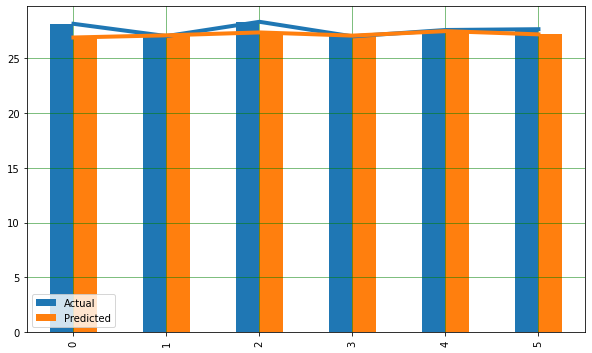

In [302]:
df1.plot(kind='bar',figsize = (10,6))                              #Plotting the visualization to get a better understanding
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.plot(df1,linewidth=4)
plt.show()

In [303]:
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_pred)) #Checking the error rate
print("Mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("Mean absolute error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error: 0.48732269234670866
Mean squared error: 0.45499563586500785
Mean absolute error: 0.6745336432417643


#Humidity

In [304]:
df

,Station,YEAR,AMT,AMiT,AR,AH,AWS,ACC,ABS,R Area,R Pro,W Area,W Pro,GN Area,GN Pro,Tob Area,Tob Pro,Ba Area,Ba Pro
0,Dinajpur,2000,33.316667,20.000000,124.833333,81.083333,0.566667,3.216667,6.183333,1452000,1328000,229857,115654,350,150,580,175,2772,18035
1,Dinajpur,2001,33.691667,20.250000,185.500000,79.500000,0.558333,3.166667,6.616667,1396000,1285000,239835,119874,390,185,450,140,2790,18072
2,Dinajpur,2002,33.600000,20.283333,212.416667,80.666667,0.608333,3.475000,6.725000,1364000,1254000,238917,120012,420,210,480,150,3075,18247
3,Dinajpur,2003,33.133333,20.066667,171.416667,82.250000,0.608333,3.500000,6.158333,1402000,1410000,245328,129981,550,235,390,100,3257,18820
4,Dinajpur,2004,33.383333,20.025000,191.083333,81.333333,0.575000,3.558333,5.891667,1497000,1390000,249835,136545,730,295,320,80,3588,19720
5,Dinajpur,2005,33.508333,20.391667,247.916667,80.750000,0.508333,3.608333,6.508333,1570000,1502000,251198,147945,630,260,300,80,3860,20765
6,Dinajpur,2006,34.241667,20.616667,107.083333,78.750000,0.591667,3.391667,6.366667,1578000,1624000,192415,164105,1720,810,230,55,2710,18105
7,Dinajpur,2007,34.250000,20.375000,131.583333,78.916667,0.700000,3.375000,6.183333,1637000,1737000,207635,203779,7395,4500,150,40,3830,29060
8,Dinajpur,2008,33.391667,20.500000,147.666667,80.750000,0.633333,3.633333,6.266667,1716000,2068000,214110,179735,7203,4524,207,46,4042,30814
9,Dinajpur,2009,33.958333,20.533333,168.750000,78.166667,1.625000,3.183333,6.358333,1820000,2207000,209567,217798,8766,5458,197,52,4032,31704


In [306]:
x = df[['YEAR','AMT','AMiT','AR','AWS','ACC','ABS']].values #Assigning prediction variable
y = df['AH'].values #Assigning targt variable

In [307]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 1) #Splitting the dataset into training and testing part

In [308]:
regressor = LinearRegression() #Choosing the model
regressor.fit(x_train,y_train) #Fitting the training data into the model to train the model

LinearRegression()

In [309]:
y_pred = regressor.predict(x_test) #Predicting the output

In [310]:
df2 = pd.DataFrame({'Actual':y_test.flatten(),'Prediction':y_pred.flatten()})
df2.head(5)

,Actual,Prediction
0,82.250000,80.806057
1,76.369000,76.374080
2,78.750000,78.678179
3,77.750000,74.685261
4,80.666667,79.522482


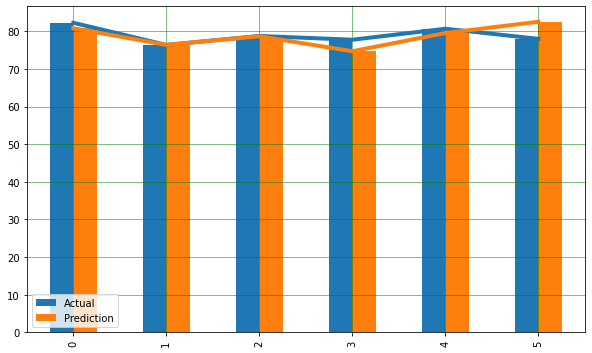

In [311]:
df2.plot(kind='bar',figsize = (10,6))                              #Plotting the visualization to get a better understanding
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.plot(df2,linewidth=4)
plt.show()

In [312]:
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_pred)) #Checking the error rate
print("Mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("Mean absolute error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error: 1.709297292580698
Mean squared error: 5.546126860200906
Mean absolute error: 2.3550216262703207


#Windflow

In [225]:
df

,Station,YEAR,AMT,AMiT,AR,AH,AWS,ACC,ABS,R Area,R Pro,W Area,W Pro,GN Area,GN Pro,Tob Area,Tob Pro,Ba Area,Ba Pro
0,Dinajpur,2000,33.316667,20.000000,124.833333,81.083333,0.566667,3.216667,6.183333,1452000,1328000,229857,115654,350,150,580,175,2772,18035
1,Dinajpur,2001,33.691667,20.250000,185.500000,79.500000,0.558333,3.166667,6.616667,1396000,1285000,239835,119874,390,185,450,140,2790,18072
2,Dinajpur,2002,33.600000,20.283333,212.416667,80.666667,0.608333,3.475000,6.725000,1364000,1254000,238917,120012,420,210,480,150,3075,18247
3,Dinajpur,2003,33.133333,20.066667,171.416667,82.250000,0.608333,3.500000,6.158333,1402000,1410000,245328,129981,550,235,390,100,3257,18820
4,Dinajpur,2004,33.383333,20.025000,191.083333,81.333333,0.575000,3.558333,5.891667,1497000,1390000,249835,136545,730,295,320,80,3588,19720
5,Dinajpur,2005,33.508333,20.391667,247.916667,80.750000,0.508333,3.608333,6.508333,1570000,1502000,251198,147945,630,260,300,80,3860,20765
6,Dinajpur,2006,34.241667,20.616667,107.083333,78.750000,0.591667,3.391667,6.366667,1578000,1624000,192415,164105,1720,810,230,55,2710,18105
7,Dinajpur,2007,34.250000,20.375000,131.583333,78.916667,0.700000,3.375000,6.183333,1637000,1737000,207635,203779,7395,4500,150,40,3830,29060
8,Dinajpur,2008,33.391667,20.500000,147.666667,80.750000,0.633333,3.633333,6.266667,1716000,2068000,214110,179735,7203,4524,207,46,4042,30814
9,Dinajpur,2009,33.958333,20.533333,168.750000,78.166667,1.625000,3.183333,6.358333,1820000,2207000,209567,217798,8766,5458,197,52,4032,31704


In [313]:
x = df[['YEAR','AMT','AMiT','AR','AH','ACC','ABS']].values #Assigning prediction variable
y = df['AWS'].values #Assigning target variable

In [314]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 1) #Splitting the dataset into training and testing part

In [315]:
regressor = LinearRegression() #Choosing the model
regressor.fit(x_train,y_train) #Fitting the training data into the model to train the model

LinearRegression()

In [316]:
y_pred = regressor.predict(x_test) #Predicting the output

In [318]:
df3 = pd.DataFrame({'Actual':y_test.flatten(),'Prediction':y_pred.flatten()}) #Comparing the actual an predicted output
df3.head()

,Actual,Prediction
0,0.608333,0.451124
1,1.874150,1.632855
2,0.591667,0.503607
3,1.758333,0.878094
4,0.608333,0.284109


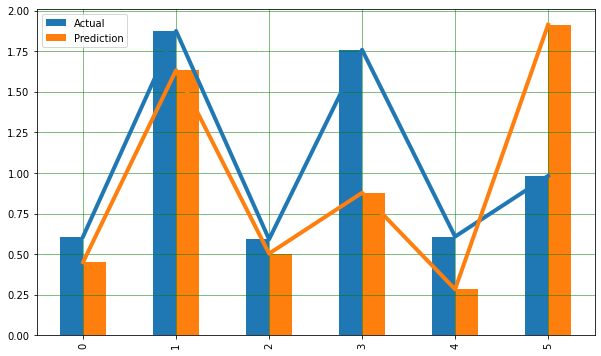

In [319]:
df3.plot(kind='bar',figsize = (10,6))                              #Plotting the visualization to get a better understanding
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.plot(df3,linewidth=4)
plt.show()

In [320]:
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_pred)) #Checking the error rate
print("Mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("Mean absolute error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error: 0.4368315846168824
Mean squared error: 0.30591074033219967
Mean absolute error: 0.5530919818006763


#**3. Apply Liner regression to predict wheat, banana, tobaco, Ground Nut production prediction**

#Wheat

In [ ]:
df

,Station,YEAR,AMT,AMiT,AR,AH,AWS,ACC,ABS,R Area,R Pro,W Area,W Pro,GN Area,GN Pro,Tob Area,Tob Pro,Ba Area,Ba Pro
0,Dinajpur,2000,33.316667,20.000000,124.833333,81.083333,0.566667,3.216667,6.183333,1452000,1328000,229857,115654,350,150,580,175,2772,18035
1,Dinajpur,2001,33.691667,20.250000,185.500000,79.500000,0.558333,3.166667,6.616667,1396000,1285000,239835,119874,390,185,450,140,2790,18072
2,Dinajpur,2002,33.600000,20.283333,212.416667,80.666667,0.608333,3.475000,6.725000,1364000,1254000,238917,120012,420,210,480,150,3075,18247
3,Dinajpur,2003,33.133333,20.066667,171.416667,82.250000,0.608333,3.500000,6.158333,1402000,1410000,245328,129981,550,235,390,100,3257,18820
4,Dinajpur,2004,33.383333,20.025000,191.083333,81.333333,0.575000,3.558333,5.891667,1497000,1390000,249835,136545,730,295,320,80,3588,19720
5,Dinajpur,2005,33.508333,20.391667,247.916667,80.750000,0.508333,3.608333,6.508333,1570000,1502000,251198,147945,630,260,300,80,3860,20765
6,Dinajpur,2006,34.241667,20.616667,107.083333,78.750000,0.591667,3.391667,6.366667,1578000,1624000,192415,164105,1720,810,230,55,2710,18105
7,Dinajpur,2007,34.250000,20.375000,131.583333,78.916667,0.700000,3.375000,6.183333,1637000,1737000,207635,203779,7395,4500,150,40,3830,29060
8,Dinajpur,2008,33.391667,20.500000,147.666667,80.750000,0.633333,3.633333,6.266667,1716000,2068000,214110,179735,7203,4524,207,46,4042,30814
9,Dinajpur,2009,33.958333,20.533333,168.750000,78.166667,1.625000,3.183333,6.358333,1820000,2207000,209567,217798,8766,5458,197,52,4032,31704


In [338]:
x = df[['YEAR','AMT','AMiT','AR','AH','AWS','ACC','ABS','W Area']].values #Assigning prediction variable
y = df['W Pro'].values #Assigning targt variable

In [339]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0) #Splitting the dataset into training and testing part

In [340]:
regressor = LinearRegression() #Choosing the model
regressor.fit(x_train,y_train) #Fitting the training data into the model to train the model

LinearRegression()

In [341]:
y_pred = regressor.predict(x_test) #Predicting the output

In [342]:
df4 = pd.DataFrame({'Actual':y_test.flatten(),'Prediction':y_pred.flatten()}) #Comparing the actual an predicted output
df4.head()

,Actual,Prediction
0,241874,243499.295536
1,119874,125575.103689
2,252514,293423.848907
3,179735,191332.436088
4,241090,211403.743397


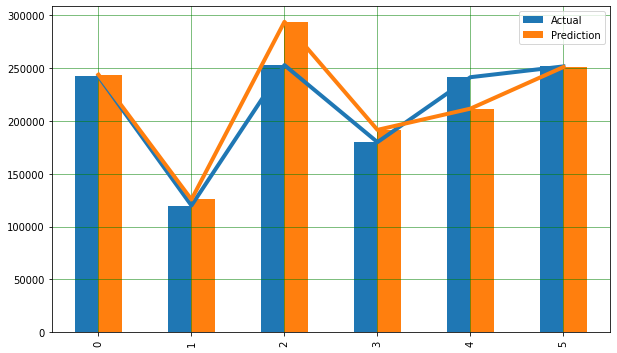

In [343]:
df4.plot(kind='bar',figsize = (10,6))                              #Plotting the visualization to get a better understanding
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.plot(df4,linewidth=4)
plt.show()

In [344]:
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_pred)/10000) #Checking the error rate
print("Mean squared error:",metrics.mean_squared_error(y_test,y_pred)/(10000*10000))
print("Mean absolute error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)/(10000)))

Mean absolute error: 1.5020475478018323
Mean squared error: 4.541496273706238
Mean absolute error: 213.10786643637155


#Banana

In [250]:
df

,Station,YEAR,AMT,AMiT,AR,AH,AWS,ACC,ABS,R Area,R Pro,W Area,W Pro,GN Area,GN Pro,Tob Area,Tob Pro,Ba Area,Ba Pro
0,Dinajpur,2000,33.316667,20.000000,124.833333,81.083333,0.566667,3.216667,6.183333,1452000,1328000,229857,115654,350,150,580,175,2772,18035
1,Dinajpur,2001,33.691667,20.250000,185.500000,79.500000,0.558333,3.166667,6.616667,1396000,1285000,239835,119874,390,185,450,140,2790,18072
2,Dinajpur,2002,33.600000,20.283333,212.416667,80.666667,0.608333,3.475000,6.725000,1364000,1254000,238917,120012,420,210,480,150,3075,18247
3,Dinajpur,2003,33.133333,20.066667,171.416667,82.250000,0.608333,3.500000,6.158333,1402000,1410000,245328,129981,550,235,390,100,3257,18820
4,Dinajpur,2004,33.383333,20.025000,191.083333,81.333333,0.575000,3.558333,5.891667,1497000,1390000,249835,136545,730,295,320,80,3588,19720
5,Dinajpur,2005,33.508333,20.391667,247.916667,80.750000,0.508333,3.608333,6.508333,1570000,1502000,251198,147945,630,260,300,80,3860,20765
6,Dinajpur,2006,34.241667,20.616667,107.083333,78.750000,0.591667,3.391667,6.366667,1578000,1624000,192415,164105,1720,810,230,55,2710,18105
7,Dinajpur,2007,34.250000,20.375000,131.583333,78.916667,0.700000,3.375000,6.183333,1637000,1737000,207635,203779,7395,4500,150,40,3830,29060
8,Dinajpur,2008,33.391667,20.500000,147.666667,80.750000,0.633333,3.633333,6.266667,1716000,2068000,214110,179735,7203,4524,207,46,4042,30814
9,Dinajpur,2009,33.958333,20.533333,168.750000,78.166667,1.625000,3.183333,6.358333,1820000,2207000,209567,217798,8766,5458,197,52,4032,31704


In [252]:
x = df[['YEAR','AMT','AMiT','AR','AH','AWS','ACC','ABS','Ba Area']].values #Assigning prediction variable
y = df['Ba Pro'].values #Assigning targt variable

In [253]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0) #Splitting the dataset into training and testing part

In [254]:
regressor = LinearRegression() #Choosing the model
regressor.fit(x_train,y_train) #Fitting the training data into the model to train the model

LinearRegression()

In [255]:
y_pred = regressor.predict(x_test) #Predicting the output

In [256]:
df5 = pd.DataFrame({'Actual':y_test.flatten(),'Prediction':y_pred.flatten()}) #Comparing the actual an predicted output
df5.head()

,Actual,Prediction
0,39001,39902.124882
1,18072,17363.984080
2,38992,38600.965403
3,30814,26231.489006


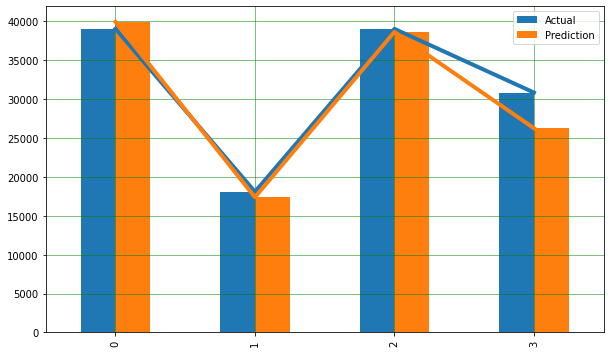

In [257]:
df5.plot(kind='bar',figsize = (10,6))                              #Plotting the visualization to get a better understanding
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.plot(df5,linewidth=4)
plt.show()

In [292]:
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_pred)/1000) #Checking the error rate
print("Mean squared error:",metrics.mean_squared_error(y_test,y_pred)/(1000*1000))
print("Mean absolute error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)/(1000)))

Mean absolute error: 0.19725640430908606
Mean squared error: 0.06753313192375811
Mean absolute error: 8.2178544598793


#Tobacco

In [261]:
df

,Station,YEAR,AMT,AMiT,AR,AH,AWS,ACC,ABS,R Area,R Pro,W Area,W Pro,GN Area,GN Pro,Tob Area,Tob Pro,Ba Area,Ba Pro
0,Dinajpur,2000,33.316667,20.000000,124.833333,81.083333,0.566667,3.216667,6.183333,1452000,1328000,229857,115654,350,150,580,175,2772,18035
1,Dinajpur,2001,33.691667,20.250000,185.500000,79.500000,0.558333,3.166667,6.616667,1396000,1285000,239835,119874,390,185,450,140,2790,18072
2,Dinajpur,2002,33.600000,20.283333,212.416667,80.666667,0.608333,3.475000,6.725000,1364000,1254000,238917,120012,420,210,480,150,3075,18247
3,Dinajpur,2003,33.133333,20.066667,171.416667,82.250000,0.608333,3.500000,6.158333,1402000,1410000,245328,129981,550,235,390,100,3257,18820
4,Dinajpur,2004,33.383333,20.025000,191.083333,81.333333,0.575000,3.558333,5.891667,1497000,1390000,249835,136545,730,295,320,80,3588,19720
5,Dinajpur,2005,33.508333,20.391667,247.916667,80.750000,0.508333,3.608333,6.508333,1570000,1502000,251198,147945,630,260,300,80,3860,20765
6,Dinajpur,2006,34.241667,20.616667,107.083333,78.750000,0.591667,3.391667,6.366667,1578000,1624000,192415,164105,1720,810,230,55,2710,18105
7,Dinajpur,2007,34.250000,20.375000,131.583333,78.916667,0.700000,3.375000,6.183333,1637000,1737000,207635,203779,7395,4500,150,40,3830,29060
8,Dinajpur,2008,33.391667,20.500000,147.666667,80.750000,0.633333,3.633333,6.266667,1716000,2068000,214110,179735,7203,4524,207,46,4042,30814
9,Dinajpur,2009,33.958333,20.533333,168.750000,78.166667,1.625000,3.183333,6.358333,1820000,2207000,209567,217798,8766,5458,197,52,4032,31704


In [262]:
x = df[['YEAR','AMT','AMiT','AR','AH','AWS','ACC','ABS','Tob Area']].values #Assigning prediction variable
y = df['Tob Pro'].values #Assigning targt variable

In [263]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0) #Splitting the dataset into training and testing part

In [264]:
regressor = LinearRegression() #Choosing the model
regressor.fit(x_train,y_train) #Fitting the training data into the model to train the model

LinearRegression()

In [266]:
y_pred = regressor.predict(x_test) #Predicting the output

In [267]:
df6 = pd.DataFrame({'Actual':y_test.flatten(),'Prediction':y_pred.flatten()}) #Comparing the actual an predicted output
df6.head()

,Actual,Prediction
0,38,26.078065
1,140,127.760591
2,32,64.299943
3,46,60.876477


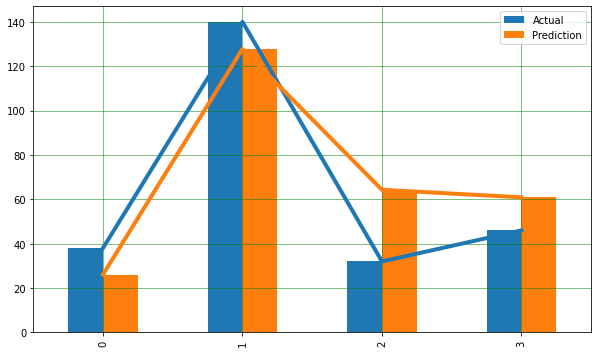

In [268]:
df6.plot(kind='bar',figsize = (10,6))                              #Plotting the visualization to get a better understanding
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.plot(df6,linewidth=4)
plt.show()

In [289]:
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_pred)/100) #Checking the error rate
print("Mean squared error:",metrics.mean_squared_error(y_test,y_pred)/(100*100))
print("Mean absolute error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred))/(100))

Mean absolute error: 1.9725640430908606
Mean squared error: 6.753313192375811
Mean absolute error: 2.5987137572991394


#Ground Nut

In [274]:
df

,Station,YEAR,AMT,AMiT,AR,AH,AWS,ACC,ABS,R Area,R Pro,W Area,W Pro,GN Area,GN Pro,Tob Area,Tob Pro,Ba Area,Ba Pro
0,Dinajpur,2000,33.316667,20.000000,124.833333,81.083333,0.566667,3.216667,6.183333,1452000,1328000,229857,115654,350,150,580,175,2772,18035
1,Dinajpur,2001,33.691667,20.250000,185.500000,79.500000,0.558333,3.166667,6.616667,1396000,1285000,239835,119874,390,185,450,140,2790,18072
2,Dinajpur,2002,33.600000,20.283333,212.416667,80.666667,0.608333,3.475000,6.725000,1364000,1254000,238917,120012,420,210,480,150,3075,18247
3,Dinajpur,2003,33.133333,20.066667,171.416667,82.250000,0.608333,3.500000,6.158333,1402000,1410000,245328,129981,550,235,390,100,3257,18820
4,Dinajpur,2004,33.383333,20.025000,191.083333,81.333333,0.575000,3.558333,5.891667,1497000,1390000,249835,136545,730,295,320,80,3588,19720
5,Dinajpur,2005,33.508333,20.391667,247.916667,80.750000,0.508333,3.608333,6.508333,1570000,1502000,251198,147945,630,260,300,80,3860,20765
6,Dinajpur,2006,34.241667,20.616667,107.083333,78.750000,0.591667,3.391667,6.366667,1578000,1624000,192415,164105,1720,810,230,55,2710,18105
7,Dinajpur,2007,34.250000,20.375000,131.583333,78.916667,0.700000,3.375000,6.183333,1637000,1737000,207635,203779,7395,4500,150,40,3830,29060
8,Dinajpur,2008,33.391667,20.500000,147.666667,80.750000,0.633333,3.633333,6.266667,1716000,2068000,214110,179735,7203,4524,207,46,4042,30814
9,Dinajpur,2009,33.958333,20.533333,168.750000,78.166667,1.625000,3.183333,6.358333,1820000,2207000,209567,217798,8766,5458,197,52,4032,31704


In [275]:
x = df[['YEAR','AMT','AMiT','AR','AH','AWS','ACC','ABS','GN Area']].values #Assigning prediction variable
y = df['GN Pro'].values #Assigning target variable

In [276]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0) #Splitting the dataset into training and testing part

In [277]:
regressor = LinearRegression() #Choosing the model
regressor.fit(x_train,y_train) #Fitting the training data into the model to train the model

LinearRegression()

In [278]:
y_pred = regressor.predict(x_test) #Predicting the output

In [279]:
df7 = pd.DataFrame({'Actual':y_test.flatten(),'Prediction':y_pred.flatten()}) #Comparing the actual an predicted output
df7.head()

,Actual,Prediction
0,6847,6381.650216
1,185,55.595338
2,7892,7700.085999
3,4524,4526.357171


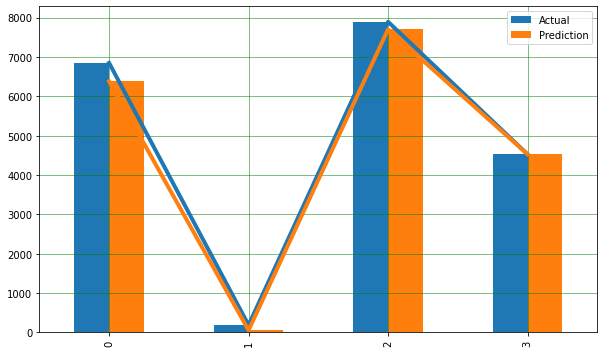

In [280]:
df7.plot(kind='bar',figsize = (10,6))                              #Plotting the visualization to get a better understanding
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.plot(df7,linewidth=4)
plt.show()

In [293]:
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_pred)/100) #Checking the error rate
print("Mean squared error:",metrics.mean_squared_error(y_test,y_pred)/(100*100))
print("Mean absolute error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)/100))

Mean absolute error: 1.9725640430908606
Mean squared error: 6.753313192375811
Mean absolute error: 25.987137572991394
